In [1]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [2]:
from key import api_key

In [3]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [4]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [5]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [6]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [7]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [8]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [9]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [10]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [11]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [12]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

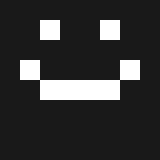

In [13]:

smiley_pattern = np.array([
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1,0.1,0.1, 1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1, 1,0.1,0.1,0.1,0.1, 1,0.1],
        [0.1,0.1, 1, 1, 1, 1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
    ])
binary_array_to_png_and_display(smiley_pattern,scale_factor=20)

smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.57160117 0.84747882 0.32056331]
  [0.22357672 0.94588882 0.94652016]
  [0.94816187 0.44591158 0.88182258]
  [0.60197836 0.29578473 0.6467153 ]
  [0.49566366 0.03990031 0.22937884]
  [0.41561057 0.44777924 0.00395344]
  [0.90121394 0.57100614 0.62064222]
  [0.91233272 0.77702451 0.93453384]]

 [[0.67331089 0.68342547 0.84922656]
  [0.49867922 0.5313276  0.17563581]
  [0.64998413 0.50717595 0.16862773]
  [0.281367   0.15496815 0.32315641]
  [0.01630602 0.98806104 0.56583033]
  [0.65854393 0.60102282 0.53485118]
  [0.14473021 0.49195197 0.98468027]
  [0.75884186 0.63522848 0.50206135]]

 [[0.24303172 0.47052917 0.7597823 ]
  [0.2223

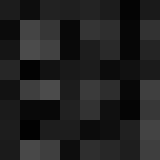

Current loss: 0.4407186993242259


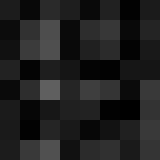

Current loss: 0.36499278113513933


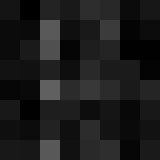

Current loss: 0.29624611478814167


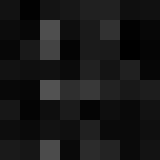

Current loss: 0.26316856153815615


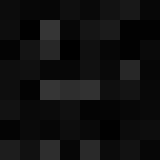

Current loss: 0.22447621461699496


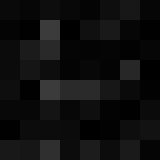

Current loss: 0.2043717008215412


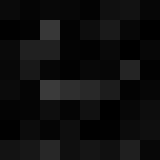

Current loss: 0.17327238811681733


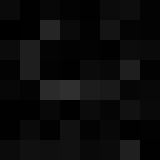

Current loss: 0.14559383026973205


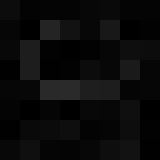

Current loss: 0.11601779236632437


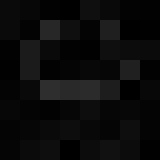

Current loss: 0.08935842522572612


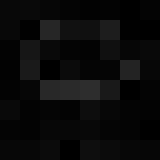

Current loss: 0.07859597341086466


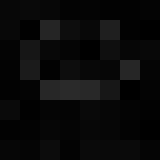

Current loss: 0.06352951887704905


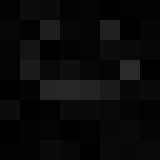

Current loss: 0.05909650644728093


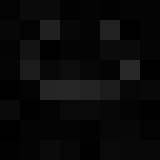

Current loss: 0.051536525733704486


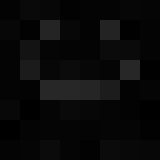

Current loss: 0.04158895785603445


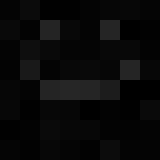

Current loss: 0.040409402582325504


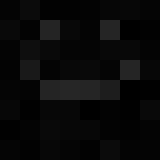

Current loss: 0.038179029266594555


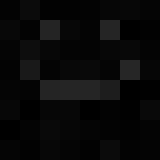

Current loss: 0.034067687808101876


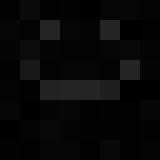

Current loss: 0.027407130154464165


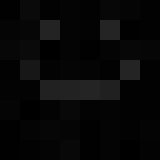

Current loss: 0.02193282696512666


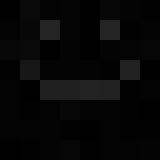

Current loss: 0.01947604644837453


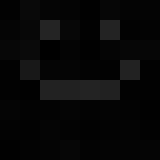

Current loss: 0.017603904905392542


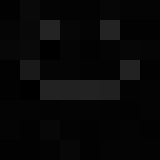

Current loss: 0.01644186866024122


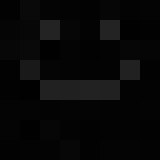

Current loss: 0.014892174359911525


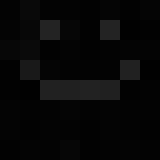

Current loss: 0.013365299594524482


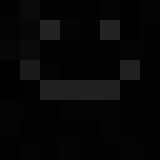

Current loss: 0.012474239761261274


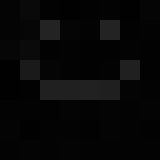

Current loss: 0.011542105151884918


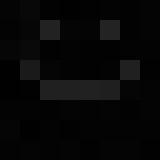

Current loss: 0.010692249468693515


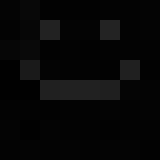

Current loss: 0.009949314957094946


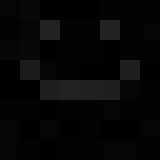

Current loss: 0.00904568379927273


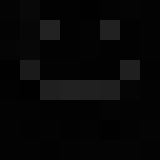

Current loss: 0.00812033524450273


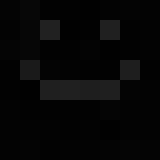

Current loss: 0.007224946588549885


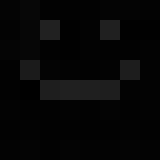

Current loss: 0.006655534878960534


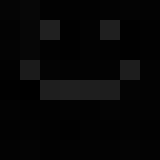

Current loss: 0.005951101012231175


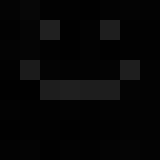

Current loss: 0.005165812158944405


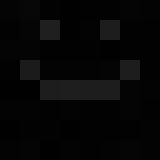

Current loss: 0.00456431426238002


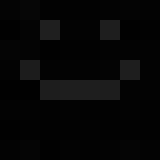

Current loss: 0.004158465618651519


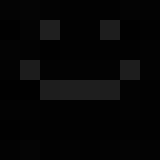

Current loss: 0.0037811462170537213


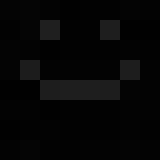

Current loss: 0.0034478486233378014


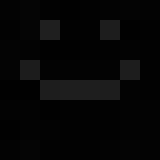

Current loss: 0.0030577513271033974


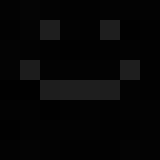

Current loss: 0.0026007983013017766


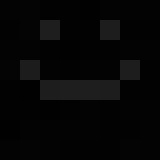

Current loss: 0.002283206790092085


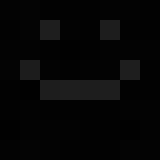

Current loss: 0.0019490746525911984


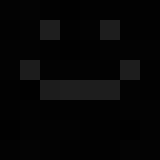

Current loss: 0.0016687689830769958


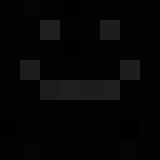

Current loss: 0.0015031030933877476


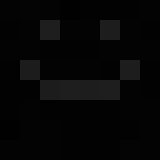

Current loss: 0.0013007610725540575


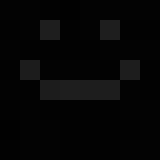

Current loss: 0.0011355587039599824


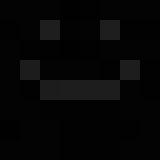

Current loss: 0.0010348070663881437


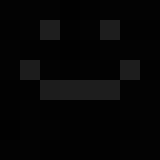

Current loss: 0.0009300455623112436


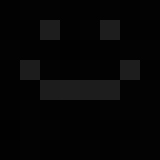

Current loss: 0.0007827859714301111


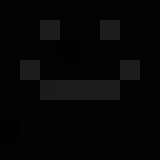

Current loss: 0.0006833385963368466


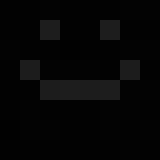

Current loss: 0.0006137715924775522


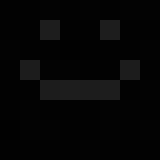

Current loss: 0.0005406524879244534


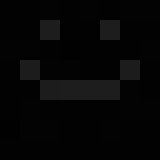

Current loss: 0.00046336487342102384


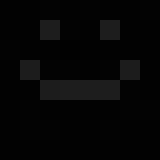

Current loss: 0.00040716927687067805


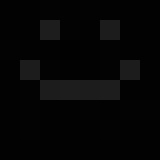

Current loss: 0.0003428849942529455


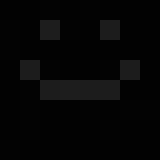

Current loss: 0.0002982525077113163


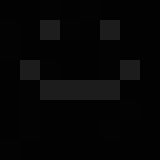

Current loss: 0.00026130226756138075


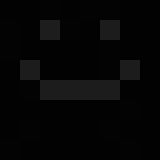

Current loss: 0.00022011770684782217


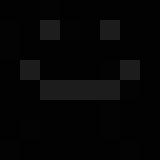

Current loss: 0.00018053015238983505


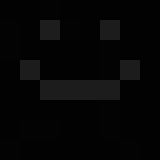

Current loss: 0.00015132625127800559


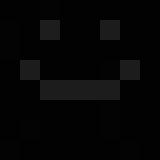

Current loss: 0.00013070322164321357


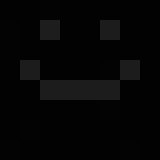

Current loss: 0.00011064304779495604


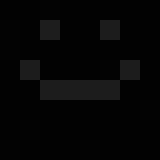

Current loss: 9.292248680503601e-05


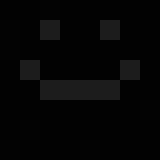

Current loss: 6.957604206458967e-05


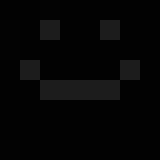

Current loss: 5.1772296964847087e-05


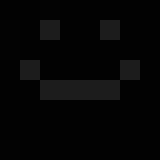

Current loss: 4.303148779605248e-05


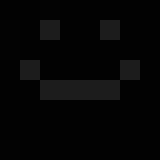

Current loss: 3.695171682505105e-05


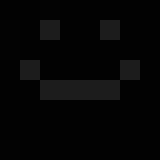

Current loss: 3.241670810960606e-05


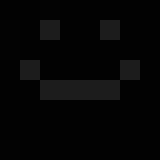

Current loss: 2.863660110574706e-05


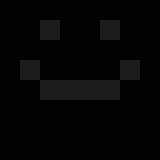

Current loss: 2.5829857787096344e-05


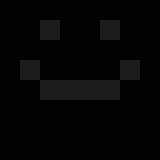

Current loss: 2.400508812372415e-05


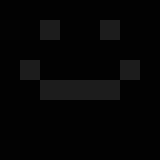

Current loss: 2.2666561939721497e-05


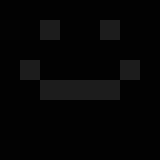

Current loss: 2.1510271712377182e-05


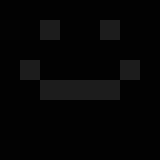

Current loss: 2.0483092582956886e-05


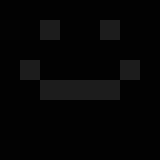

Current loss: 1.955291200028686e-05


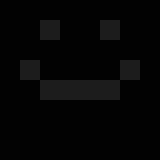

Current loss: 1.8579540202567912e-05


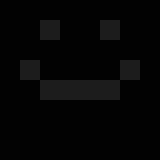

Current loss: 1.7483108055049712e-05


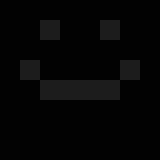

Current loss: 1.64745919152276e-05


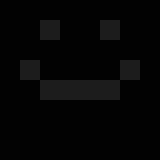

Current loss: 1.5653906027979225e-05


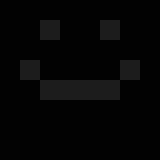

Current loss: 1.4895309786489008e-05


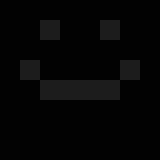

Current loss: 1.4076212580094172e-05


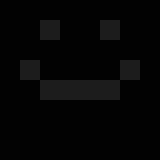

Current loss: 1.3252251246154145e-05


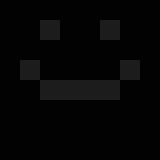

Current loss: 1.2508833947322273e-05


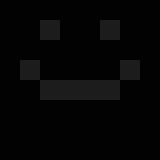

Current loss: 1.1806518075196948e-05


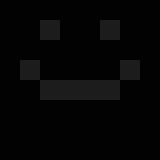

Current loss: 1.1063127308141851e-05


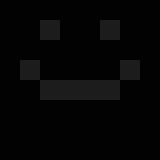

Current loss: 1.0321133325774667e-05


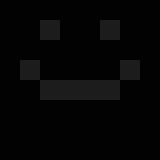

Current loss: 9.669740379303349e-06


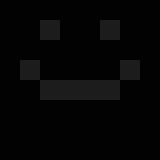

Current loss: 9.098253712536142e-06


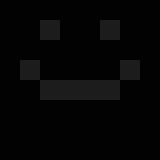

Current loss: 8.528956974340751e-06


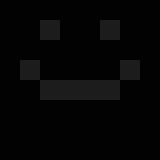

Current loss: 7.955386049585123e-06


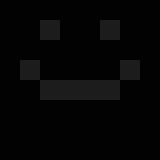

Current loss: 7.438069987375506e-06


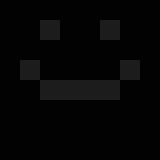

Current loss: 6.984179347302444e-06


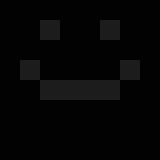

Current loss: 6.504216734759538e-06


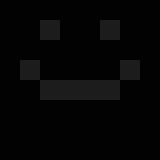

Current loss: 5.957959257507639e-06


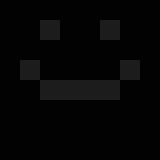

Current loss: 5.423771081591866e-06


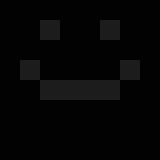

Current loss: 5.005398891810842e-06


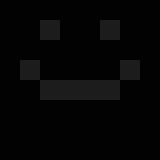

Current loss: 4.6821230758054e-06


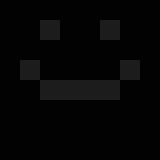

Current loss: 4.3784196958052135e-06


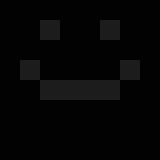

Current loss: 4.04875505144453e-06


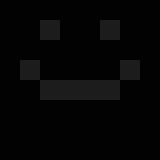

Current loss: 3.7076096678356762e-06


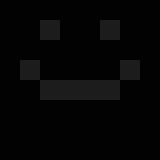

Current loss: 3.3720408854076567e-06


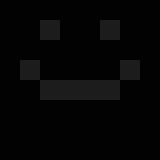

Current loss: 3.056650630606228e-06


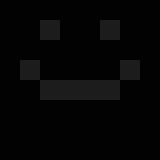

Current loss: 2.78278693510714e-06


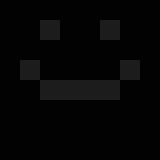

Current loss: 2.554945665034225e-06


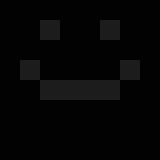

Current loss: 2.3406125126967936e-06


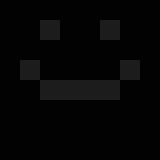

Current loss: 2.114632472904887e-06


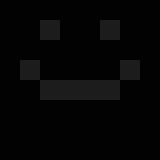

Current loss: 1.8914561035199284e-06


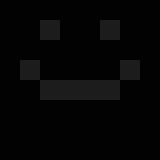

Current loss: 1.6982479310589937e-06


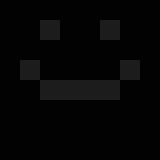

Current loss: 1.518140703038462e-06


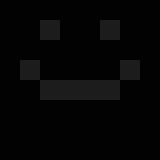

Current loss: 1.3029693730626235e-06


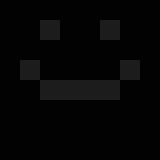

Current loss: 1.0330395997515396e-06


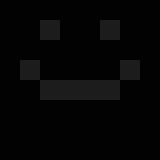

Current loss: 7.697660719951926e-07


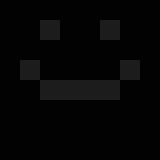

Current loss: 5.770112536662708e-07


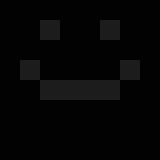

Current loss: 4.4683913336118763e-07


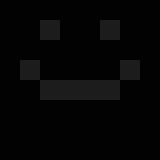

Current loss: 3.462348105998103e-07


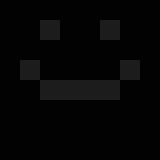

Current loss: 2.711366943186633e-07


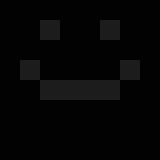

Current loss: 2.2307366687179808e-07


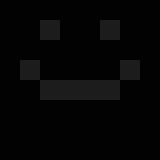

Current loss: 1.87729770395606e-07


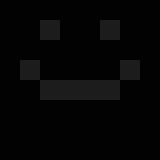

Current loss: 1.4987357643825305e-07


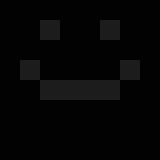

Current loss: 1.0740892653071654e-07


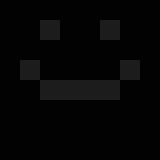

Current loss: 7.243287192260084e-08


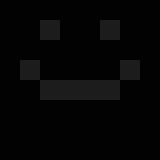

Current loss: 5.325096930075546e-08


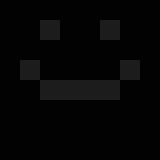

Current loss: 4.394659103290621e-08


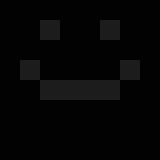

Current loss: 3.735252795955546e-08


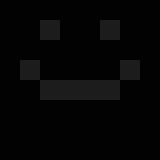

Current loss: 3.061657216640867e-08


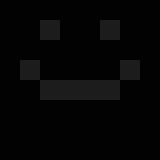

Current loss: 2.3245778191238742e-08


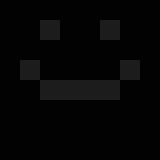

Current loss: 1.589009357427784e-08


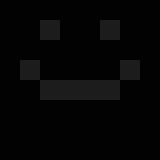

Current loss: 1.0387241067277841e-08


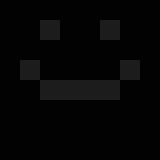

Current loss: 7.61350760214441e-09


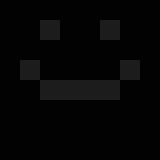

Current loss: 6.443614086748539e-09


In [14]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1-score

def callback(params):
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    print("Current loss:", objective(params))
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [15]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [ 0.57160465  0.95569368  0.16658733  0.22357985  1.40409423  0.95586988
  0.94816403  0.76105965  1.00638369  0.6019823   0.30094872  0.28901443
  0.49566422  0.63486988  0.03557162  0.4156133   0.55785631  0.02729779
  0.9012179   0.94912539  0.69877673  0.91233434  0.8077454   1.03994437
  0.38977207  0.3169037   1.04523524  0.20285716 -0.31053742 -0.2123609
  1.0290501   1.02879113 -0.1758696   0.69071426  0.53518815  0.68847639
 -0.10869028  1.68261073  0.54059936  0.71377414  1.04669157  0.2433095
  0.39136011  0.45151332  0.81618895  1.05668317  0.37879697  0.90707498
  0.66608461  0.51511142  1.25062445  0.68390213  0.37248088  0.79811784
  0.21297915  0.75378773  0.72362971  0.76468726  0.12614021  0.574614
  0.43852658  0.75582348  1.15774673  0.45538996  0.627203    0.839425
  0.42144034 -0.49137232  0.64169284  0.50157249  0.52630303  0.59248629
  0.34659922 -0.12618352  0.67396726  0.22056473  0.39765391  0.06840392
  1.05102471  0.942403    0.4081187

In [16]:
res = circuit(weights_p1,0)
# print(res)

In [17]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


TypeError: only integer scalar arrays can be converted to a scalar index